## DEMO: 1D particle in a box

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets.widgets import interact, interactive

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

- Set atomic units: $h=1, m=1$

$$\psi_n(x)=\sqrt{\frac{2}{L}}sin \frac{n\pi x}{L}$$

$$E_n = \frac{n^2 h^2}{8m L^2}$$

In [2]:
h, m = 1, 1 
hbar = h/(2*np.pi)

def energy(n=1, L=1):
        
        En = (n**2 * np.pi**2 * hbar**2) / (2 * m * L**2)
        
        return En

    
def psi(x, n=1, L=1):
        
        fn = np.sqrt(2/L)*np.sin(n*np.pi*x/L)
        
        return fn 

### Compute energies

In [3]:
energy(n=3) #-energy(n=1)

1.1250000000000002

### Compare wave function and its square

Text(0.5, 1.0, 'n=4')

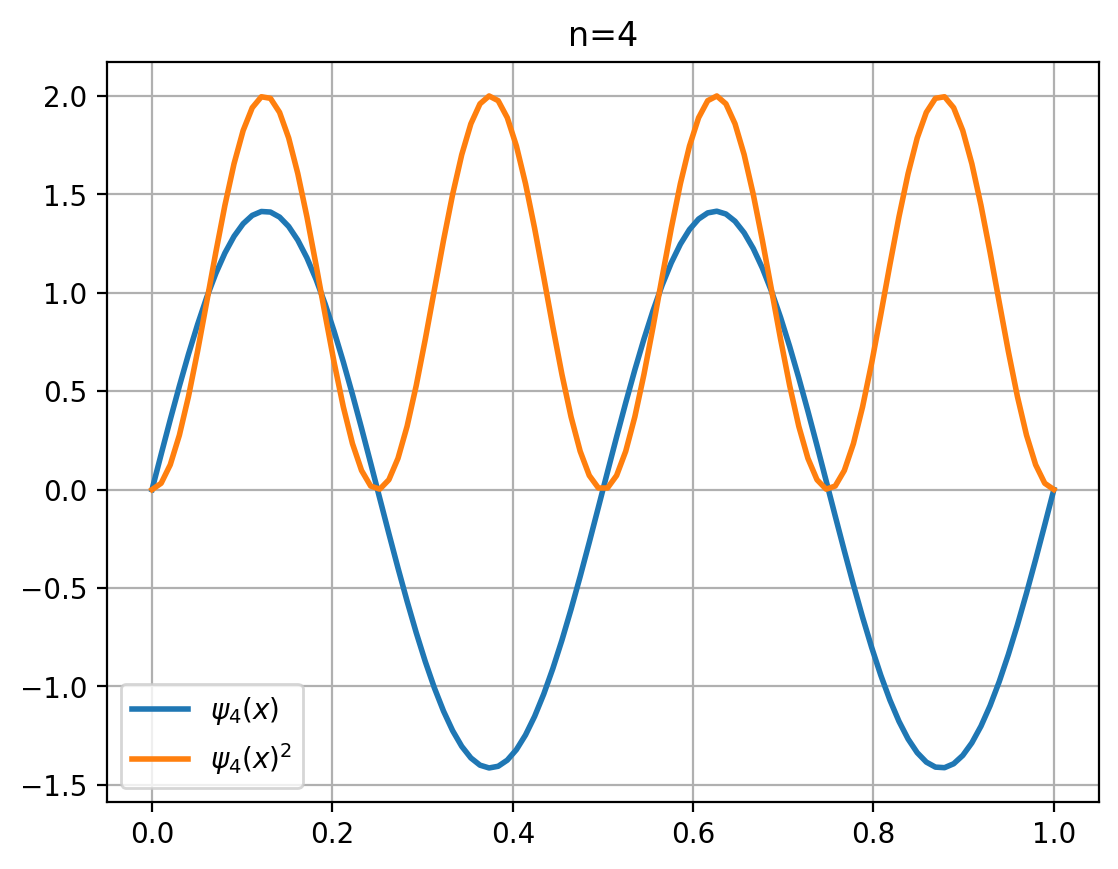

In [4]:
### Change these values
n=4
L=1

### Compute wavefunction and its square
x = np.linspace(0, L, 100)
psi1d = psi(x, n=n, L=L)

### Plot wave function and its square
plt.plot(x, psi1d, lw=2, label=f'$\psi_{n}(x)$')
plt.plot(x, psi1d**2, lw=2, label=f'$\psi_{n}(x)^2$')
plt.grid('--')
plt.legend()
plt.title(f'n={n}')

### Interactive exploration of 1D quantum particle in a box

In [5]:
def plot_energy_levels(L=1, max_n=1):
    
    fig, (ax, ax2) = plt.subplots(figsize=(8, 6), ncols=2)

    for n in range(1, max_n+1):
        
        En = energy(n, L)
        
        ax.hlines(En, 0.5, 1.5, colors='blue', linewidth=2)
        ax.text(1.6, En, f"n={n}, E={En:.2f}", verticalalignment='center')
        
    ax.set_xlim(0, 3)
    ax.set_ylim(0, energy(max_n+1))
    ax.set_xlabel("Particle in a Box")
    ax.set_ylabel("Energy")
    ax.set_title("Energy Levels of a 1D Quantum Particle in a Box")
    ax.axes.get_xaxis().set_visible(False)
    
    x = np.linspace(0, L, 1000)
    psi1d = psi(x, n=max_n, L=L)
   
    ax2.fill(x, psi1d**2, color="green", lw=3)
    ax2.set_xlim([-0.1, L+0.1])
    ax2.set_ylim([0, 4])
    
    # Put two red lines to indicate boundaries
    ax2.axvline(0,0,10*L, color='red',lw=3)
    ax2.axvline(L,0,10*L, color='red',lw=3)
    
    # Label axis
    ax2.set_xlabel('x',fontsize=20)
    ax2.set_ylabel('$\psi_n^2(x)$',fontsize=20)
    
    #Put tiltle
    ax2.set_title('n='+str(n))
    
    plt.tight_layout()
    plt.show()

In [6]:
interact(plot_energy_levels, L=(0.5,2), max_n=(1,10))

interactive(children=(FloatSlider(value=1.0, description='L', max=2.0, min=0.5), IntSlider(value=1, descriptio…

<function __main__.plot_energy_levels(L=1, max_n=1)>

### Numerical computations with PIB wavefunctions

**Evaluate the following quantities using particle in a box wavefunctions**

- Most likely to be in the middle thrid of box
- Average momentum and momentum square
- Average position and position square
- Show uncertainty relation

But how do we compute derivatives numerically?

In [8]:
from  numpy import gradient as grad

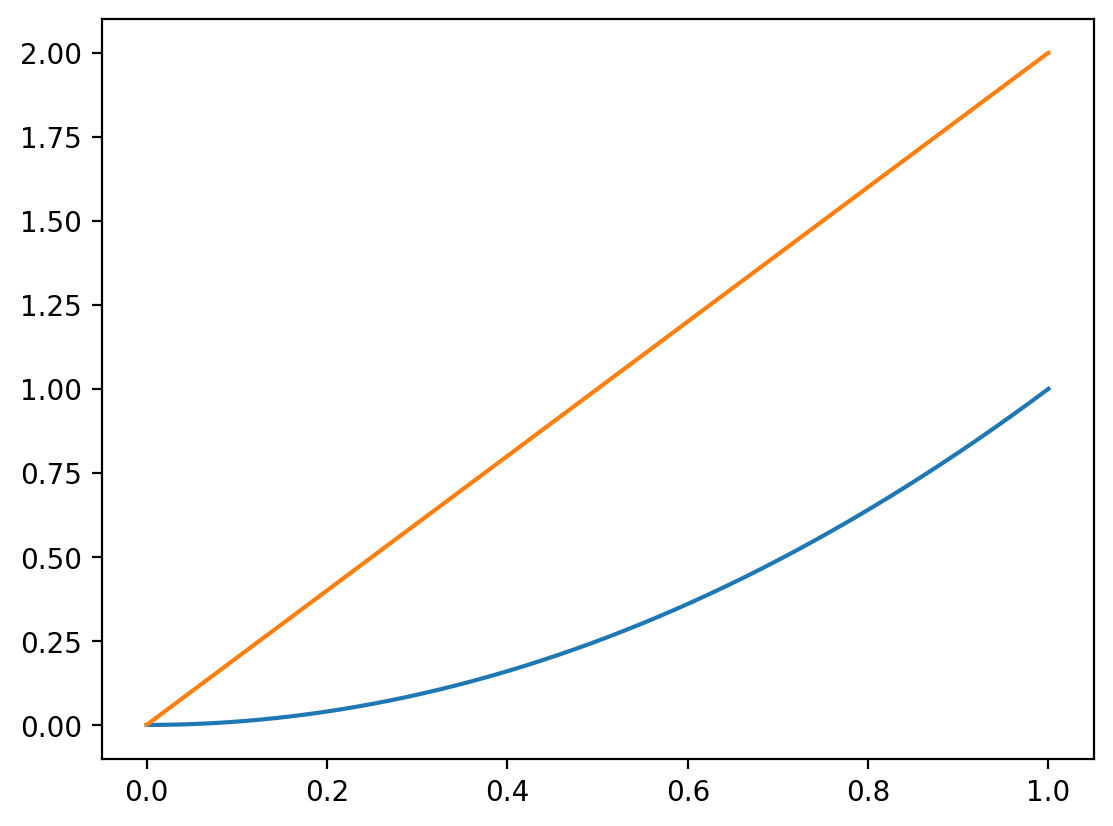

In [11]:
x = np.linspace(0, 1, 1000)

### A function f(x)
f = x**2
plt.plot(x, f)

### First derivative function f(x)
dfdx = grad(f, x)
plt.plot(x, dfdx)

### Second derivative function f(x)